In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Define the URL to fetch the Boston dataset
data_url = "http://lib.stat.cmu.edu/datasets/boston"

# Read the dataset into a pandas DataFrame
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)

# Parse the data manually (You can ignore this part if you're not interested in details)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

# Store the features and target in DataFrame
df = pd.DataFrame(data, columns=[f"Feature_{i+1}" for i in range(data.shape[1])])
df['Target'] = target

# Checking the data
print(df.head())


<>:12: SyntaxWarning: invalid escape sequence '\s'
<>:12: SyntaxWarning: invalid escape sequence '\s'
C:\Users\USER\AppData\Local\Temp\ipykernel_12132\2835796397.py:12: SyntaxWarning: invalid escape sequence '\s'
  raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)


   Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Feature_6  \
0    0.00632       18.0       2.31        0.0      0.538      6.575   
1    0.02731        0.0       7.07        0.0      0.469      6.421   
2    0.02729        0.0       7.07        0.0      0.469      7.185   
3    0.03237        0.0       2.18        0.0      0.458      6.998   
4    0.06905        0.0       2.18        0.0      0.458      7.147   

   Feature_7  Feature_8  Feature_9  Feature_10  Feature_11  Feature_12  \
0       65.2     4.0900        1.0       296.0        15.3      396.90   
1       78.9     4.9671        2.0       242.0        17.8      396.90   
2       61.1     4.9671        2.0       242.0        17.8      392.83   
3       45.8     6.0622        3.0       222.0        18.7      394.63   
4       54.2     6.0622        3.0       222.0        18.7      396.90   

   Feature_13  Target  
0        4.98    24.0  
1        9.14    21.6  
2        4.03    34.7  
3        2.94    33.4  
4       

In [3]:
# Features (X) and Target (y)
X = df.drop('Target', axis=1)
y = df['Target']

# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data (scaling features)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [5]:
# Linear Regression from scratch

# Adding a column of 1's for the intercept term (bias)
X_train_b = np.c_[np.ones(X_train_scaled.shape[0]), X_train_scaled]
X_test_b = np.c_[np.ones(X_test_scaled.shape[0]), X_test_scaled]

# Normal Equation for Linear Regression: theta = (X^T * X)^-1 * X^T * y
theta = np.linalg.inv(X_train_b.T.dot(X_train_b)).dot(X_train_b.T).dot(y_train)

# Predictions
y_pred_lr = X_test_b.dot(theta)

# Calculate RMSE and R² for Linear Regression
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression RMSE: {rmse_lr}")
print(f"Linear Regression R²: {r2_lr}")


Linear Regression RMSE: 4.928602182665339
Linear Regression R²: 0.6687594935356317


In [7]:
from sklearn.ensemble import RandomForestRegressor

# Create a RandomForest model
rf_model = RandomForestRegressor(n_estimators=10, random_state=42)

# Train the RandomForest model
rf_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test_scaled)

# Calculate RMSE and R² for Random Forest
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest RMSE: {rmse_rf}")
print(f"Random Forest R²: {r2_rf}")


Random Forest RMSE: 3.007496842043556
Random Forest R²: 0.8766593394598554


In [9]:
import xgboost as xgb

# Convert data to DMatrix format (required by XGBoost)
dtrain = xgb.DMatrix(X_train_scaled, label=y_train)
dtest = xgb.DMatrix(X_test_scaled, label=y_test)

# Set parameters for XGBoost
params = {
    'objective': 'reg:squarederror',  # For regression
    'max_depth': 5,                   # Max depth of trees
    'eta': 0.1,                       # Learning rate
}

# Train the model with 100 boosting rounds
model_xgb = xgb.train(params, dtrain, num_boost_round=100)

# Make predictions
y_pred_xgb = model_xgb.predict(dtest)

# Calculate RMSE and R² for XGBoost
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost RMSE: {rmse_xgb}")
print(f"XGBoost R²: {r2_xgb}")


XGBoost RMSE: 2.474175274242995
XGBoost R²: 0.9165249217500149


In [11]:
# Comparing Model Performance

print("Model Performance Comparison:")

# Linear Regression
print(f"Linear Regression RMSE: {rmse_lr}")
print(f"Linear Regression R²: {r2_lr}")

# Random Forest
print(f"Random Forest RMSE: {rmse_rf}")
print(f"Random Forest R²: {r2_rf}")

# XGBoost
print(f"XGBoost RMSE: {rmse_xgb}")
print(f"XGBoost R²: {r2_xgb}")


Model Performance Comparison:
Linear Regression RMSE: 4.928602182665339
Linear Regression R²: 0.6687594935356317
Random Forest RMSE: 3.007496842043556
Random Forest R²: 0.8766593394598554
XGBoost RMSE: 2.474175274242995
XGBoost R²: 0.9165249217500149


Model Performance Comparison:
Linear Regression RMSE: 4.928602182665339
Linear Regression R²: 0.6687594935356317
Random Forest RMSE: 3.007496842043556
Random Forest R²: 0.8766593394598554
XGBoost RMSE: 2.63365779932728
XGBoost R²: 0.9054166701205973


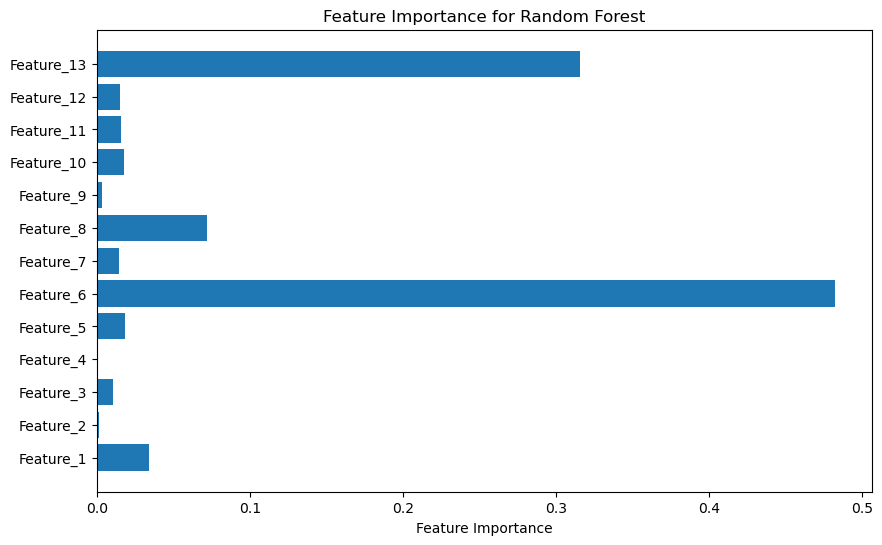

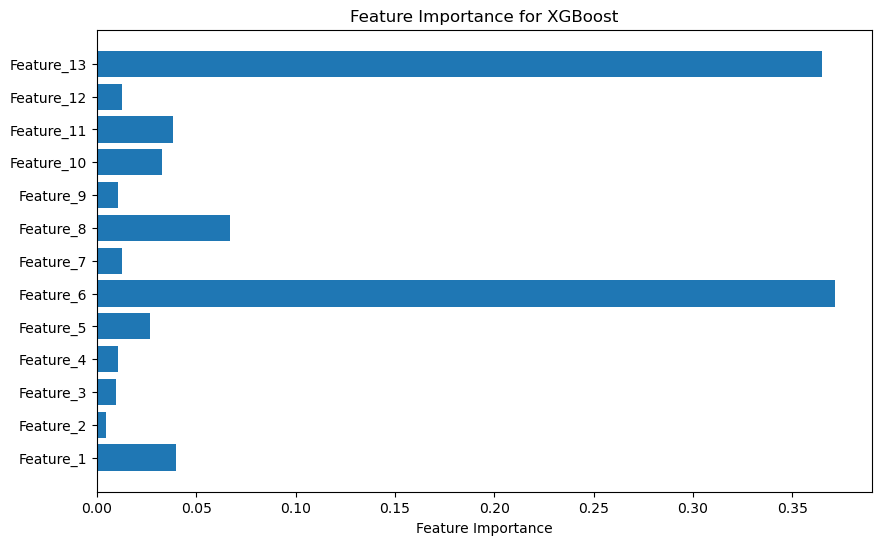

In [15]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the XGBoost model
xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
xgb_predictions = xgb_model.predict(X_test)

# Evaluate the XGBoost model
rmse_xgb = np.sqrt(mean_squared_error(y_test, xgb_predictions))
r2_xgb = r2_score(y_test, xgb_predictions)

# Compare Model Performance
print("Model Performance Comparison:")
print(f"Linear Regression RMSE: {rmse_lr}")
print(f"Linear Regression R²: {r2_lr}")
print(f"Random Forest RMSE: {rmse_rf}")
print(f"Random Forest R²: {r2_rf}")
print(f"XGBoost RMSE: {rmse_xgb}")
print(f"XGBoost R²: {r2_xgb}")

# Visualize Feature Importance for Random Forest
plt.figure(figsize=(10, 6))
plt.barh(range(len(rf_model.feature_importances_)), rf_model.feature_importances_)
plt.yticks(range(len(X.columns)), X.columns)
plt.xlabel("Feature Importance")
plt.title("Feature Importance for Random Forest")
plt.show()

# Visualize Feature Importance for XGBoost
plt.figure(figsize=(10, 6))
plt.barh(range(len(xgb_model.feature_importances_)), xgb_model.feature_importances_)
plt.yticks(range(len(X.columns)), X.columns)
plt.xlabel("Feature Importance")
plt.title("Feature Importance for XGBoost")
plt.show()


In [25]:
from sklearn.linear_model import LinearRegression

# Initialize the Linear Regression model
lr_model = LinearRegression()

# Train the model
lr_model.fit(X_train, y_train)

# Linear Regression Predictions
lr_predictions = lr_model.predict(X_test)


In [41]:
# Random Forest Predictions
rf_predictions = rf_model.predict(X_test)

# XGBoost Predictions
xgb_predictions = xgb_model.predict(X_test)





C:\Users\USER\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


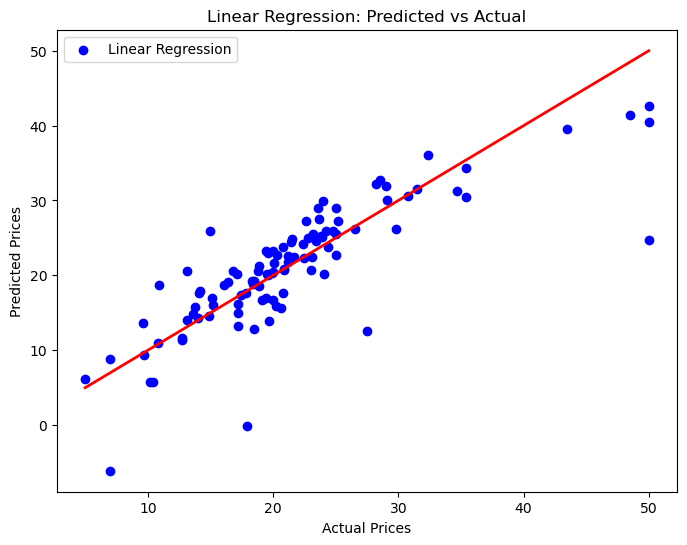

In [43]:
# Predicted vs Actual for Linear Regression
plt.figure(figsize=(8, 6))
plt.scatter(y_test, lr_predictions, color='blue', label='Linear Regression')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Linear Regression: Predicted vs Actual')
plt.legend()
plt.show()

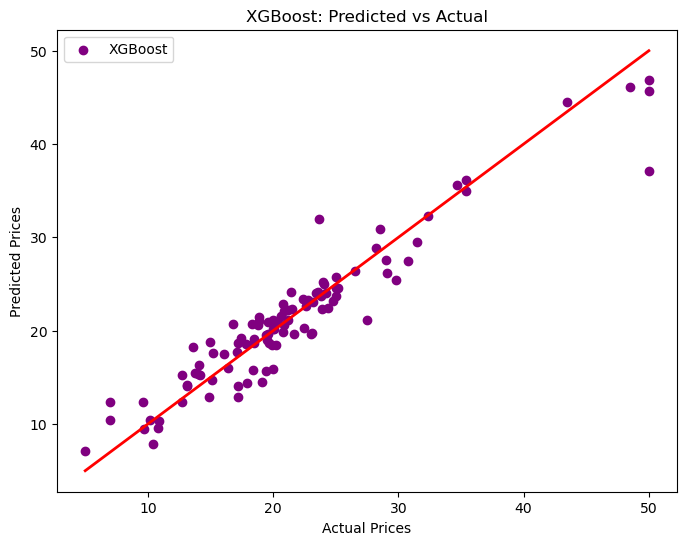

In [45]:
# Predicted vs Actual for XGBoost
plt.figure(figsize=(8, 6))
plt.scatter(y_test, xgb_predictions, color='purple', label='XGBoost')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('XGBoost: Predicted vs Actual')
plt.legend()
plt.show()

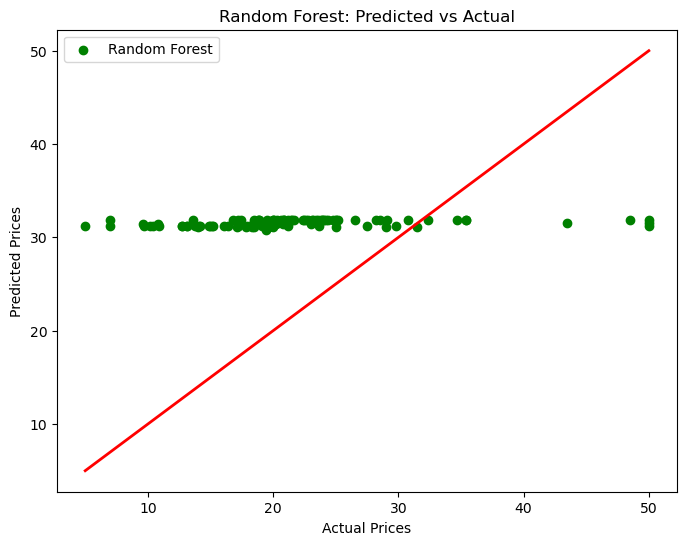

In [47]:
# Predicted vs Actual for Random Forest
plt.figure(figsize=(8, 6))
plt.scatter(y_test, rf_predictions, color='green', label='Random Forest')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Random Forest: Predicted vs Actual')
plt.legend()
plt.show()


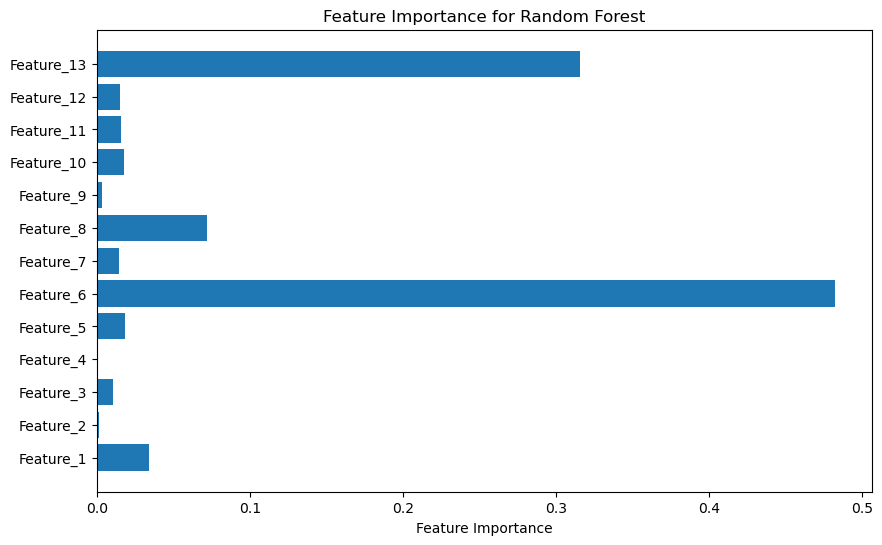

In [49]:
# Visualize Feature Importance for Random Forest
plt.figure(figsize=(10, 6))
plt.barh(range(len(rf_model.feature_importances_)), rf_model.feature_importances_)
plt.yticks(range(len(X.columns)), X.columns)
plt.xlabel("Feature Importance")
plt.title("Feature Importance for Random Forest")
plt.show()

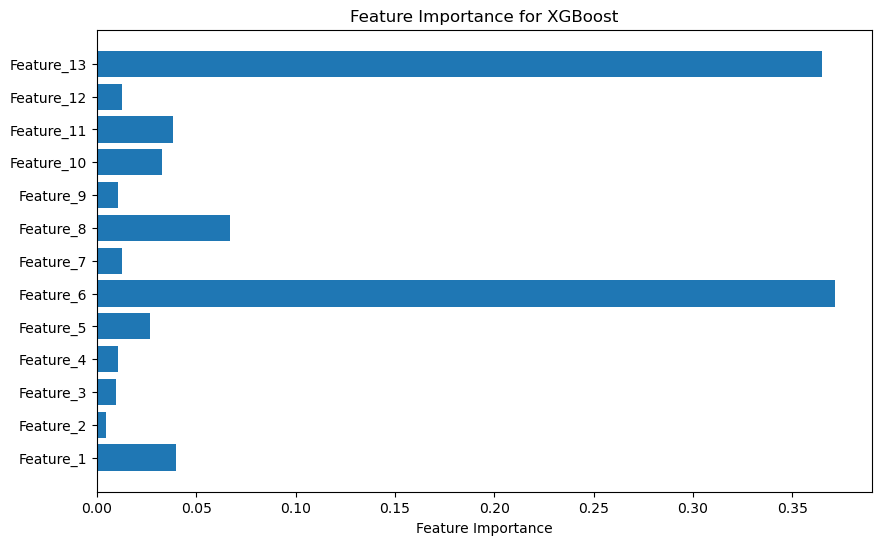

In [51]:
# Visualize Feature Importance for XGBoost
plt.figure(figsize=(10, 6))
plt.barh(range(len(xgb_model.feature_importances_)), xgb_model.feature_importances_)
plt.yticks(range(len(X.columns)), X.columns)
plt.xlabel("Feature Importance")
plt.title("Feature Importance for XGBoost")
plt.show()
